In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Task 1
Read 256x256 cameraman grayscale image and apply the following edge detection algorithms to the input image

1. Robert Operator
2. Prewitt Operator
3. Sobel Operator
4. Canny Edge Detecter

Use subplot to display the results and comment on the observes result.

In [2]:
img = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)

#### 1. Robert's Cross Operator from https://homepages.inf.ed.ac.uk/rbf/HIPR2/roberts.htm

In [3]:
def robert_cross_operator(img):
    Hx = np.array([[1, 0],
                   [0, -1]])
    Hy = np.array([[0, 1],
                   [-1, 0]])
    
    Gx = cv2.filter2D(img, -1, Hx)
    Gy = cv2.filter2D(img, -1, Hy)
    
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

#### 2. Prewitt's Gradient Edge Detector from https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm#4

In [4]:
def prewitt_gradient_edge_detector(img):
    Hx = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
    Hy = np.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]])
    
    Gx = cv2.filter2D(img, -1, Hx)
    Gy = cv2.filter2D(img, -1, Hy)
    
    G = np.arctan2(Gy, Gx)
    return G

#### 3. Sobel's Operator

In [5]:
def sobel_operator(img):
    Gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    Gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

#### 4. Canny Edge Detector

In [6]:
def canny_edge_detector(img):
    edges = cv2.Canny(img, 100, 200)
    return edges

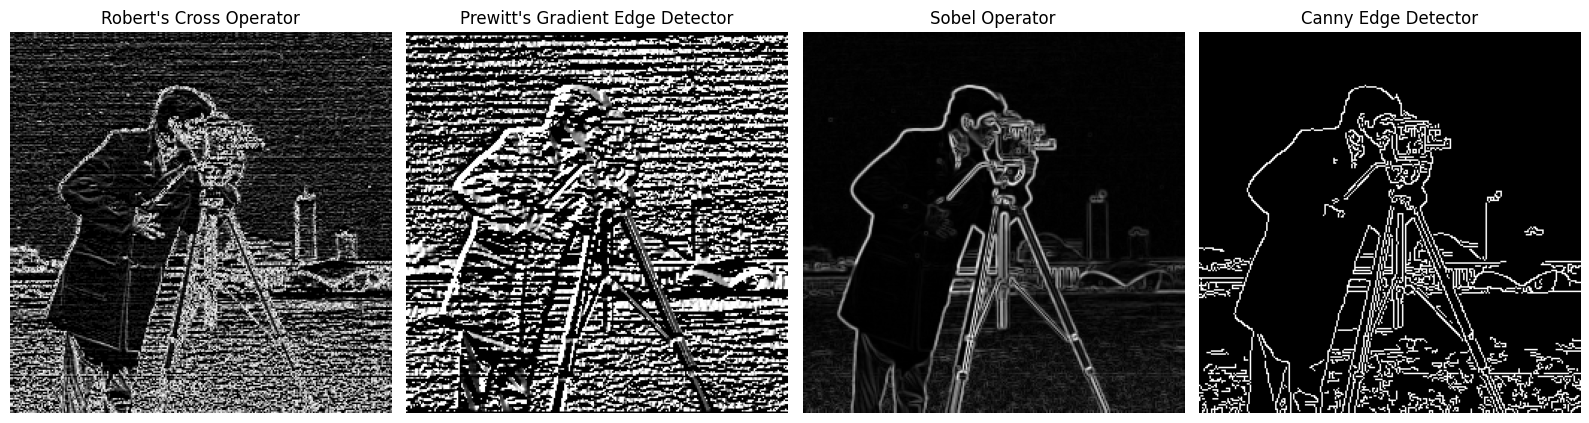

In [7]:
plt.figure(figsize=(16, 16))

plt.subplot(141), plt.imshow(robert_cross_operator(img), cmap='gray'), plt.title("Robert's Cross Operator"), plt.axis('off')
plt.subplot(142), plt.imshow(prewitt_gradient_edge_detector(img), cmap='gray'), plt.title("Prewitt's Gradient Edge Detector"), plt.axis('off')
plt.subplot(143), plt.imshow(sobel_operator(img), cmap='gray'), plt.title("Sobel Operator"), plt.axis('off')
plt.subplot(144), plt.imshow(canny_edge_detector(img), cmap='gray'), plt.title("Canny Edge Detector"), plt.axis('off')

plt.tight_layout()

**Observations:**
- The inbuilt functions for Sobel and Canny produced better results for edges.
- Prewitt's Gradient Edge Detector performs really poorly with a vanilla implementation.